In [3]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb
from sklearn.linear_model import LogisticRegression



In [5]:
# Import preprocessed data from the 'data/processed' folder
X_train = pd.read_csv('../data/processed/X_train_scaled.csv')
X_test = pd.read_csv('../data/processed/X_test_scaled.csv')
y_train = pd.read_csv('../data/processed/y_train.csv').squeeze()  # Squeeze to convert it to Series
y_test = pd.read_csv('../data/processed/y_test.csv').squeeze()    # Squeeze to convert it to Series




In [6]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier()
}


In [7]:

# Initialize a dictionary to store the results
model_results = {}

# Loop through each model and evaluate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store the results
    model_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Print the evaluation results for each model
for model_name, metrics in model_results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("-" * 40)

Model: Logistic Regression
Accuracy: 0.8162
Precision: 0.6781
Recall: 0.5818
F1 Score: 0.6263
----------------------------------------
Model: Random Forest
Accuracy: 0.7970
Precision: 0.6605
Recall: 0.4799
F1 Score: 0.5559
----------------------------------------
Model: SVM
Accuracy: 0.8070
Precision: 0.6850
Recall: 0.5013
F1 Score: 0.5789
----------------------------------------
Model: Gradient Boosting
Accuracy: 0.8041
Precision: 0.6678
Recall: 0.5174
F1 Score: 0.5831
----------------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.7587
Precision: 0.5481
Recall: 0.5040
F1 Score: 0.5251
----------------------------------------
Model: XGBoost
Accuracy: 0.7821
Precision: 0.6078
Recall: 0.4987
F1 Score: 0.5479
----------------------------------------


In [8]:
# Display results for each model
results_df = pd.DataFrame(model_results).T
print(results_df)


                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.816182   0.678125  0.581769  0.626263
Random Forest        0.797019   0.660517  0.479893  0.555901
SVM                  0.806955   0.684982  0.501340  0.578947
Gradient Boosting    0.804116   0.667820  0.517426  0.583082
K-Nearest Neighbors  0.758694   0.548105  0.504021  0.525140
XGBoost              0.782115   0.607843  0.498660  0.547865


In [9]:
# Get the best model based on the highest F1 score
best_model = results_df['F1 Score'].idxmax()
print(f"The best model is: {best_model}")


The best model is: Logistic Regression


In [10]:
# Train the best model on the full training data
best_model_instance = models[best_model]
best_model_instance.fit(X_train, y_train)

# Final evaluation
y_pred_best = best_model_instance.predict(X_test)

# Evaluate performance again
final_accuracy = accuracy_score(y_test, y_pred_best)
final_precision = precision_score(y_test, y_pred_best)
final_recall = recall_score(y_test, y_pred_best)
final_f1 = f1_score(y_test, y_pred_best)

print(f"Final Evaluation of {best_model}:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1 Score: {final_f1:.4f}")


Final Evaluation of Logistic Regression:
Accuracy: 0.8162
Precision: 0.6781
Recall: 0.5818
F1 Score: 0.6263


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib
# Instantiate and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.8161816891412349
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [14]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)



Confusion Matrix:
 [[933 103]
 [156 217]]


In [15]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score:", roc_auc)



ROC-AUC Score: 0.741174293788235


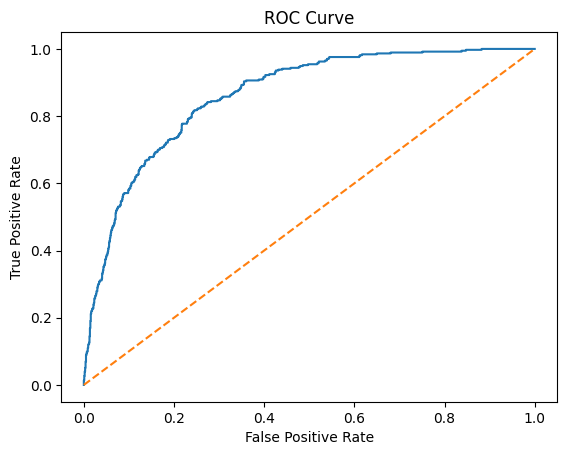

In [16]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [17]:
# Save the models
joblib.dump(model, '../models/Customer_churn_rate_model.pkl')

['../models/Customer_churn_rate_model.pkl']